## Source

This variables are created using the transports demand CSVs created in `FREIGHT_TRANSPORT_DEMAND.ipynb`

In [1]:
import numpy as np
import pandas as pd
import os
from utils.utils import EDAUtils, TransportUtils, GeneralUtils

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
edau = EDAUtils()
tu = TransportUtils()
gu = GeneralUtils()

In [4]:
# Set up paths
CURRENT_DIR_PATH = os.getcwd()
OUTPUT_DATA_DIR_PATH = os.path.join(CURRENT_DIR_PATH, "output_data")
INPUT_DATA_DIR_PATH = os.path.join(CURRENT_DIR_PATH, "input_data")

In [5]:
base_year = 2019

# aviation``|``rail_freight``|``road_heavy_freight``|``water_borne
freight_mode_shares = {
    "year": base_year,
    "frac_trns_mtkm_dem_freight_aviation": 0.0020,
    "frac_trns_mtkm_dem_freight_rail_freight": 0.0015,
    "frac_trns_mtkm_dem_freight_road_heavy_freight": 0.8698,
    "frac_trns_mtkm_dem_freight_water_borne": 0.1267
}

In [6]:
freight_mode_share_df = pd.DataFrame([freight_mode_shares])

In [7]:
freight_mode_share_df

,year,frac_trns_mtkm_dem_freight_aviation,frac_trns_mtkm_dem_freight_rail_freight,frac_trns_mtkm_dem_freight_road_heavy_freight,frac_trns_mtkm_dem_freight_water_borne
0,2019,0.002,0.0015,0.8698,0.1267


In [8]:
freight_mode_share_df = gu.extend_years_backward(freight_mode_share_df, "year", base_year, [2015, 2016, 2017, 2018])
freight_mode_share_df

,year,frac_trns_mtkm_dem_freight_aviation,frac_trns_mtkm_dem_freight_rail_freight,frac_trns_mtkm_dem_freight_road_heavy_freight,frac_trns_mtkm_dem_freight_water_borne
0,2015,0.002,0.0015,0.8698,0.1267
1,2016,0.002,0.0015,0.8698,0.1267
2,2017,0.002,0.0015,0.8698,0.1267
3,2018,0.002,0.0015,0.8698,0.1267
4,2019,0.002,0.0015,0.8698,0.1267


In [9]:
freight_mode_share_df = gu.extend_projection(freight_mode_share_df, base_year + 1, 2100)

In [10]:
freight_mode_share_df

,year,frac_trns_mtkm_dem_freight_aviation,frac_trns_mtkm_dem_freight_rail_freight,frac_trns_mtkm_dem_freight_road_heavy_freight,frac_trns_mtkm_dem_freight_water_borne
0,2015,0.002,0.0015,0.8698,0.1267
1,2016,0.002,0.0015,0.8698,0.1267
2,2017,0.002,0.0015,0.8698,0.1267
3,2018,0.002,0.0015,0.8698,0.1267
4,2019,0.002,0.0015,0.8698,0.1267
...,...,...,...,...,...
81,2096,0.002,0.0015,0.8698,0.1267
82,2097,0.002,0.0015,0.8698,0.1267
83,2098,0.002,0.0015,0.8698,0.1267
84,2099,0.002,0.0015,0.8698,0.1267


## Validation

In [11]:
# Check for duplicates
gu.check_duplicates(freight_mode_share_df)

No duplicated years found in the DataFrame.
No duplicated rows found in the DataFrame.


In [12]:
gu.check_row_sums_to_one(freight_mode_share_df)

(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True]),
 np.True_)

In [13]:
uga_global_df = pd.read_csv(os.path.join(INPUT_DATA_DIR_PATH, "sisepuede_raw_global_inputs_uganda.csv"))
uga_global_df.head()

,frac_agrc_nuts_cl1_temperate,yf_agrc_cereals_tonne_ha,frac_agrc_rice_cl2_wet,frac_agrc_cereals_cl1_tropical,frac_agrc_tubers_cl1_tropical,pop_lvst_initial_chickens,frac_agrc_bevs_and_spices_cl2_wet,frac_agrc_tubers_cl2_wet,frac_frst_primary_cl1_temperate_nutrient_rich,frac_lndu_grasslands_cl2_dry,...,nemomod_entc_frac_min_share_production_pp_biogas,nemomod_entc_frac_min_share_production_pp_coal,nemomod_entc_frac_min_share_production_pp_coal_ccs,nemomod_entc_frac_min_share_production_pp_gas,nemomod_entc_frac_min_share_production_pp_gas_ccs,nemomod_entc_frac_min_share_production_pp_geothermal,nemomod_entc_frac_min_share_production_pp_nuclear,nemomod_entc_frac_min_share_production_pp_ocean,nemomod_entc_frac_min_share_production_pp_waste_incineration,nemomod_entc_frac_min_share_production_pp_wind
0,0.030468,1.805033,0.988021,0.969532,0.969532,46039000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.030468,1.832342,0.988021,0.969532,0.969532,46291000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.030468,1.827437,0.988021,0.969532,0.969532,47578000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.030468,1.935353,0.988021,0.969532,0.969532,48901000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.030468,2.003586,0.988021,0.969532,0.969532,43121000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Comparing frac_trns_mtkm_dem_freight_aviation...


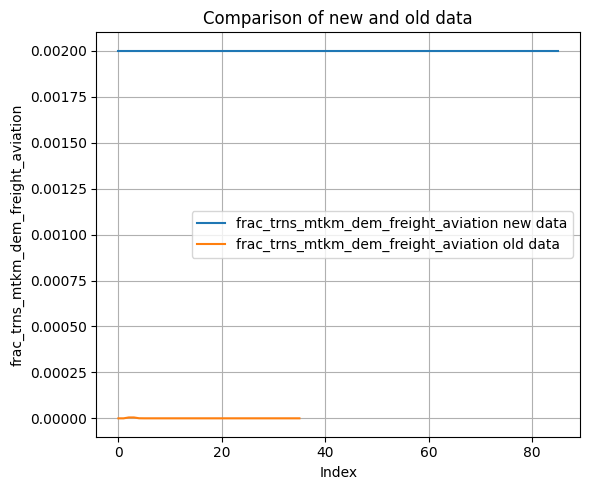

Comparing frac_trns_mtkm_dem_freight_rail_freight...


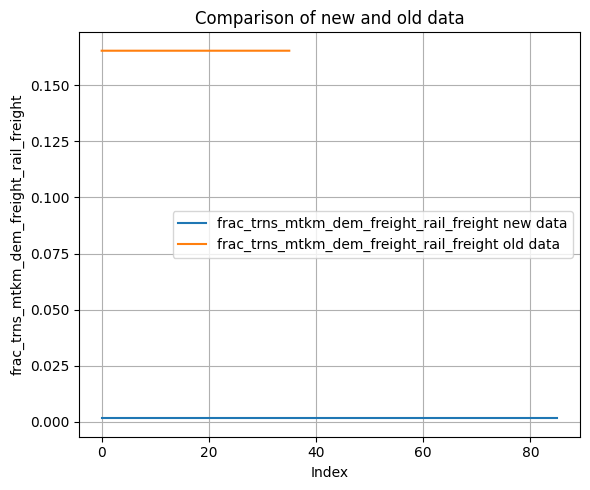

Comparing frac_trns_mtkm_dem_freight_road_heavy_freight...


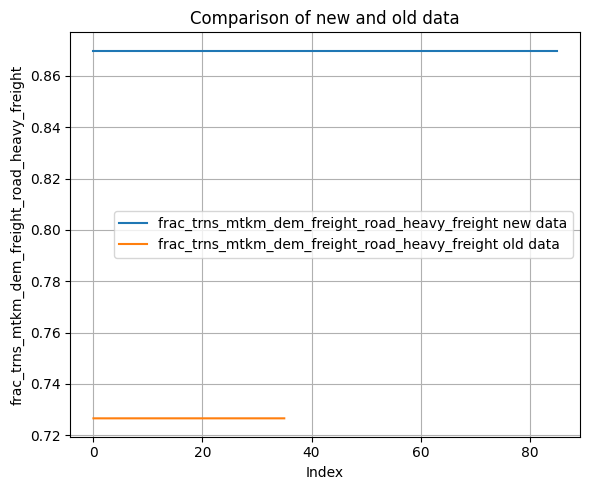

Comparing frac_trns_mtkm_dem_freight_water_borne...


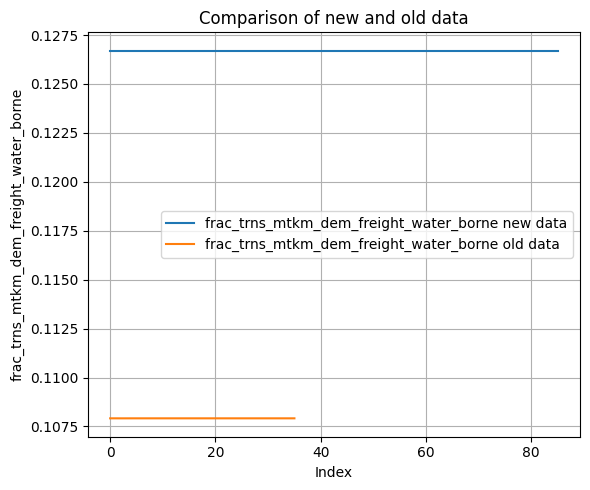

In [14]:
for col in freight_mode_share_df.columns:
    if col != "year":
        print(f"Comparing {col}...")
        edau.compare_variables(freight_mode_share_df, uga_global_df, [col])

## Save

In [15]:
freight_mode_share_df.to_csv(os.path.join(OUTPUT_DATA_DIR_PATH, "frac_trns_mtkm_dem_freight.csv"), index=False)